<a href="https://colab.research.google.com/github/wasimnawaz1/Pulmo_Disease_Classification/blob/main/pulmo_disease_using_cnn_and_lstm_models_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset
#import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx'
TB_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/TB'
PN_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/PN'
ILD_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/ILD'
COPD_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/COPD'
Asthma_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/Asthma'
Normal_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/Normal'


new_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025'
new_TB_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/TB'
new_PN_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/PN'
new_ILD_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/ILD'
new_COPD_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/COPD'
new_Asthma_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Asthma'
new_Normal_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Normal'

In [ ]:
# prompt: how to merge multiple .xlsx files starting from name A_1_ in google drive using colab

import pandas as pd
import os

def merge_xlsx_files(directory, output_filename="merged.xlsx"):
    """Merges multiple .xlsx files in a directory into a single file.

    Args:
        directory: The path to the directory containing the .xlsx files.
        output_filename: The name of the output merged .xlsx file.
    """

    all_dataframes = []
    for filename in os.listdir(directory):
        if filename.startswith("A_1_") and filename.endswith(".xlsx"):  # Adjust the starting name as needed
            filepath = os.path.join(directory, filename)
            try:
                df = pd.read_excel(filepath)
                all_dataframes.append(df)
                print(f"Successfully read: {filename}")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    if not all_dataframes:
        print("No matching .xlsx files found in the directory.")
        return

    merged_df = pd.concat(all_dataframes, ignore_index=True)
    merged_df.to_excel(os.path.join(directory, output_filename), index=False)  # Save to the same directory
    print(f"Merged files saved to: {os.path.join(directory, output_filename)}")


In [ ]:
new_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025'
new_Asthma_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Asthma'

# Example usage: Replace with your directory path
#merge_xlsx_files(new_dataset_path)
merge_xlsx_files(new_Asthma_dataset_path, "merged_Asthma.xlsx")

Successfully read: A_1_segment_1.xlsx
Successfully read: A_1_segment_2.xlsx
Error reading A_1_segment_3.xlsx: [Errno 107] Transport endpoint is not connected
Error reading A_1_segment_4.xlsx: [Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Asthma/A_1_segment_4.xlsx'
Error reading A_1_segment_5.xlsx: [Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Asthma/A_1_segment_5.xlsx'
Error reading A_1_segment_6.xlsx: [Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Asthma/A_1_segment_6.xlsx'
Error reading A_1_segment_7.xlsx: [Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025/Asthma/A_1_segment_7.xlsx'
Error reading A_1_segment_8.xlsx: [Errno 107] Transport endpoint is not connected: '/conte

ValueError: This sheet is too large! Your sheet size is: 126, 20000 Max sheet size is: 1048576, 16384

In [ ]:
# prompt: changing every .xlsx in a google drive directory to .csv

import os
import pandas as pd

def convert_xlsx_to_csv(directory):
    """Converts all .xlsx files in a directory to .csv files.

    Args:
        directory: The path to the directory containing the .xlsx files.
    """

    for filename in os.listdir(directory):
        if filename.endswith(".xlsx"):
            xlsx_filepath = os.path.join(directory, filename)
            csv_filepath = os.path.splitext(xlsx_filepath)[0] + ".csv"
            try:
                df = pd.read_excel(xlsx_filepath)
                df.to_csv(csv_filepath, index=False)  # Save as CSV without the index
                print(f"Converted: {filename} to {os.path.basename(csv_filepath)}")
                # optionally remove the xlsx file
                #os.remove(xlsx_filepath)
                #print(f"Removed: {filename}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")

# Example usage:
dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx'
convert_xlsx_to_csv(dataset_path)
TB_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/TB'
convert_xlsx_to_csv(TB_dataset_path)
PN_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/PN'
convert_xlsx_to_csv(PN_dataset_path)
ILD_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/ILD'
convert_xlsx_to_csv(ILD_dataset_path)
COPD_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/COPD'
convert_xlsx_to_csv(COPD_dataset_path)
Asthma_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/Asthma'
convert_xlsx_to_csv(Asthma_dataset_path)
Normal_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/xlsx/Normal'
convert_xlsx_to_csv(Normal_dataset_path)


Converted: TB_1_segment_1.xlsx to TB_1_segment_1.csv
Converted: TB_1_segment_2.xlsx to TB_1_segment_2.csv
Converted: TB_1_segment_3.xlsx to TB_1_segment_3.csv
Converted: TB_1_segment_4.xlsx to TB_1_segment_4.csv
Converted: TB_1_segment_5.xlsx to TB_1_segment_5.csv
Converted: TB_1_segment_6.xlsx to TB_1_segment_6.csv
Converted: TB_1_segment_7.xlsx to TB_1_segment_7.csv
Converted: TB_1_segment_8.xlsx to TB_1_segment_8.csv
Converted: TB_1_segment_9.xlsx to TB_1_segment_9.csv
Converted: TB_1_segment_10.xlsx to TB_1_segment_10.csv
Converted: TB_1_segment_11.xlsx to TB_1_segment_11.csv
Converted: TB_1_segment_12.xlsx to TB_1_segment_12.csv


KeyboardInterrupt: 

In [ ]:
a = pd.read_csv(r'/content/drive/MyDrive/PULMO_DATA/xlsx/TB/TB_1_segment_1.csv', header=None)
a

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,9.320279,67.622100,11.973366,64.430601,0.891511,70.421503,18.013656,74.203092,7.978222,66.889986,...,61.193555,22.002475,45.803735,26.303562,60.219944,28.586396,52.490771,24.573599,59.815830,25.000303
1,106.673598,119.719341,128.923097,115.918769,118.398755,107.099667,118.236829,102.862566,122.793354,100.475704,...,22.869591,32.270599,21.403563,26.099008,24.132078,34.192538,22.491069,30.193902,20.741431,33.026469
2,11.326338,9.484002,8.218518,2.598706,5.829169,6.365043,5.064933,7.300399,5.911857,9.170579,...,108.294576,78.733324,105.670509,77.032858,105.671892,75.365657,103.246599,77.067754,109.707922,78.388680
3,50.285810,39.199152,55.629744,36.900990,46.061386,43.136855,44.418590,44.849021,47.237141,50.687857,...,71.147747,123.263688,59.337489,121.083239,70.224444,123.959978,58.213294,124.200069,72.693008,122.000081
4,87.502452,80.989104,72.501512,85.455517,79.711354,76.229449,69.630030,84.845214,73.095129,91.613663,...,61.954630,46.348586,53.382693,57.339845,63.061954,47.780200,53.477093,55.019051,61.980230,46.790604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,34.197244,36.008867,32.840858,27.432941,41.070923,38.019821,37.119252,35.008040,43.398107,33.444579,...,111.550342,102.312967,106.418286,103.763248,113.669053,101.343313,107.281896,103.386043,111.193338,102.406626
60,98.110830,133.631402,88.669815,128.040498,95.958260,125.923536,86.915292,133.308969,92.368819,137.352904,...,72.176489,126.014924,63.485770,127.905662,70.051885,128.162058,64.847351,130.920218,74.484972,124.950973
61,57.699804,29.596900,66.161599,26.803686,61.114429,22.980893,60.123671,19.174144,60.990457,16.466147,...,78.436216,58.183721,68.833518,57.551773,75.593228,60.957785,70.039108,57.733388,76.820142,59.647848
62,101.236405,76.803889,102.392002,70.595079,97.636879,73.883809,98.554680,71.777601,99.628533,73.680193,...,35.513948,60.656888,39.433766,53.062749,38.803394,61.845366,36.176782,54.790731,36.599585,59.485183


In [ ]:
import scipy.io as sio
import pandas as pd

def load_mat_to_dataframe(file_path):
  mat_data = sio.loadmat(file_path)
  # Assuming the data is stored under a key like 'data' or similar.
  # You might need to inspect the .mat file to find the correct key.
  data_key = list(mat_data.keys())[-1]  #Get the last key in the dictionary

  #Check if the data_key is valid. If not, print an error message and return None
  if data_key not in mat_data:
    print(f"Error: Key '{data_key}' not found in the .mat file {file_path}")
    return None

  data = mat_data[data_key]

  #Convert the data to a Pandas DataFrame
  df = pd.DataFrame(data)
  return df

file_paths = [
    '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Mat_files_2025/Asthma.mat',
    '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Mat_files_2025/COPD.mat',
    '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Mat_files_2025/ILD.mat',
    '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Mat_files_2025/Normal_class.mat',
    '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Mat_files_2025/PN.mat',
    '/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Mat_files_2025/TB.mat'
]

dataframes = []
for file_path in file_paths:
  df = load_mat_to_dataframe(file_path)
  if df is not None:
    dataframes.append(df)

# Now we have a list called 'dataframes' containing the data from each .mat file.

In [ ]:
#Example of accessing a dataframe and printing its rows
dataframes[0]


,0,1,2,3,4,5,6,7,8,9,...,146990,146991,146992,146993,146994,146995,146996,146997,146998,146999
0,89.109984,85.932014,88.164614,89.058863,84.369189,79.976733,81.585659,83.585260,84.658887,84.501011,...,87.862726,55.643760,57.094881,80.001088,57.457257,50.507712,82.948181,55.043367,58.242029,87.057836
1,81.192145,83.796020,89.616244,84.404366,92.809512,96.213322,95.723602,99.259797,93.885952,103.185989,...,139.930732,115.543757,143.519644,145.379407,117.113280,137.189727,139.677593,112.389282,141.960168,146.605164
2,71.420006,68.487901,61.012088,69.196838,65.503897,67.671061,61.854670,61.403514,62.108153,55.455654,...,42.500430,32.416796,27.430184,42.435850,29.063048,13.744396,42.652287,36.019574,17.007504,34.102582
3,90.820957,88.267548,85.037289,97.215135,98.740783,91.662013,76.404300,72.066999,72.411213,71.618328,...,116.027841,83.310605,102.620861,111.202260,84.123770,93.426910,114.842201,85.122650,96.525103,113.127415
4,25.780510,26.511753,30.496179,26.357075,25.053534,21.074933,20.923402,16.135818,20.607613,13.337129,...,76.134473,57.794111,30.468602,67.353482,59.899719,33.255382,71.608109,50.586273,30.884127,68.378814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,51.021739,37.642588,82.506975,112.643595,109.678044,86.745119,51.134793,32.781397,92.347004,121.239771,...,134.140864,109.740756,46.198002,67.223178,96.985562,148.136001,122.038201,66.077703,62.539911,81.572550
636,96.637685,116.454730,96.469939,70.214964,42.519842,82.276522,104.590021,128.523855,87.095310,55.033651,...,53.943553,67.428709,110.472787,106.888477,65.488904,46.906145,50.466515,96.763360,118.814737,86.857649
637,65.926750,67.224340,50.642128,99.311719,71.054723,69.675968,53.753295,53.856488,68.264941,97.614974,...,94.348999,58.063447,40.025600,70.712881,64.160470,88.570884,70.194809,40.552515,66.517254,62.614591
638,16.510935,27.166554,32.139767,24.294845,31.141622,7.029199,17.885565,21.812355,37.055176,32.965560,...,31.046483,51.509884,54.626387,29.923630,28.053819,24.367133,38.751645,50.480255,30.914943,25.983796


In [ ]:
# prompt: new_dataset_path = r'/content/drive/MyDrive/PULMO_DATA/2025_new_pulmo_data/Excel__file_pulmo_2025'
# i have multiple .xlsx files at the path above, for instance, one file name is: A_3_segment_12.xlsx
# how to rename the files such that A_3_segment_12.xlsx becomes [folder_name]_3_segment_12.xlsx.

import os

def rename_files(directory):
  for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
      new_filename = os.path.basename(directory) + "_" + filename[2:]
      source = os.path.join(directory, filename)
      destination = os.path.join(directory, new_filename)
      os.rename(source, destination)

rename_files(new_dataset_path)


In [ ]:
pulmo = '/content/drive/MyDrive/PULMO_DATA/xlsx/pulmo_combined_subsampled_50_percent_rows_n_columns_normal_class_name_added.csv'

df = pd.read_csv(pulmo)
df['Disease'].value_counts()

#new_pulmo = '/content/drive/MyDrive/PULMO_DATA/xlsx/new_pulmo_combined_subsampled_50_percent_rows_n_columns_normal_class_name_added.csv'

#new_df = pd.read_csv(new_pulmo)
#new_df['Disease'].value_counts()

In [ ]:
#TB_dataset_path
#dirname
#filenames
#excel_file
#os.walk(TB_dataset_path)
#print(os.path.join(dirname, filename))
#i=1
#for filename in filenames:
    #print(i)
    #i = i+1

In [ ]:
import os

def get_excel_files(*dataset_paths):
    """
    Takes multiple dataset paths and returns a list of lists containing Excel file paths.

    Parameters:
    dataset_paths (str): Variable-length arguments of directory paths.

    Returns:
    list: A list where each element is a list of Excel file paths for a given dataset.
    """
    excel_files = []

    for dataset_path in dataset_paths:
        dataset_excel_files = []
        for dirname, _, filenames in os.walk(dataset_path):
            for filename in filenames:
                excel_file = os.path.join(dirname, filename)
                print(excel_file)  # Optional: Print file paths for verification
                dataset_excel_files.append(excel_file)
        excel_files.append(dataset_excel_files)

    return excel_files

# Example usage:
excel_files = get_excel_files(Normal_dataset_path, TB_dataset_path, PN_dataset_path, ILD_dataset_path,
                              COPD_dataset_path, Asthma_dataset_path)
new_excel_files = get_excel_files(new_Normal_dataset_path, new_TB_dataset_path, new_PN_dataset_path,
                                  new_ILD_dataset_path, new_COPD_dataset_path, new_Asthma_dataset_path)


In [ ]:
excel_files[0][0]

'/content/drive/MyDrive/PULMO_DATA/xlsx/Normal/Normal_1_segment_1.xlsx'

In [ ]:
import os
import pandas as pd
import re

def extract_subject_id(filename):
    """
    Extracts the subject number from the filename.

    Examples:
    - "A_6_segment_14.xlsx" -> 6
    - "ILD_2_segment_1.xlsx" -> 2
    - "Normal_1_segment_10.xlsx" -> 1
    - "TB_3_segment_3.xlsx" -> 3

    Parameters:
    filename (str): The name of the file.

    Returns:
    int: The extracted subject ID or None if not found.
    """
    match = re.search(r'_(\d+)_segment', filename)
    return int(match.group(1)) if match else None

print(excel_files[5][35], '\n',
      extract_subject_id(excel_files[5][35]))


/content/drive/MyDrive/PULMO_DATA/xlsx/Asthma/A_3_segment_12.xlsx 
 3


In [ ]:
len(excel_files[4])
#excel_files
#len(selected_excel_files[5])


203

In [ ]:
# prompt: how to rename .xlsx files in google drive using google colab code

import shutil

def rename_excel_files(excel_files, new_excel_files):
    """
    Renames Excel files based on extracted subject IDs.

    Args:
        excel_files: A list of lists, where each inner list contains paths to Excel files in a specific directory.
        new_excel_files: A list of lists of paths for new file locations.
    """

    for i, disease_files in enumerate(excel_files):
        for j, file_path in enumerate(disease_files):
          try:
            subject_id = extract_subject_id(file_path)

            if subject_id is not None:
                new_filename = f"{os.path.basename(new_excel_files[i][j])[:-5]}_{subject_id}.xlsx"  #preserves original file names in new directory
                new_file_path = os.path.join(os.path.dirname(new_excel_files[i][j]), new_filename)

                #print(f"Renaming '{file_path}' to '{new_file_path}'") #optional print statement for debugging
                shutil.copy2(file_path, new_file_path) #copy file to new directory with new file name
                #os.rename(file_path, new_file_path) #rename file in place. if you would prefer this method.
          except IndexError: # handle cases where directories may not have the same number of files.
            print(f"Skipping file {file_path} due to mismatched directory structure.")
            continue # continue to the next iteration of the loop.


rename_excel_files(excel_files, new_excel_files)


In [ ]:
# List of classes and their corresponding labels
class_labels = {
    'Asthma': 0,
    'COPD': 1,
    'ILD': 2,
    'PN': 3,
    'TB': 4,
    'Normal': 5
}

class_labels.keys()
# Get the class name from the appropriate position. Assuming that the class name is the second last part of the path
#parts = file.split('\\')
#class_name = parts[-2]
#print(class_name, '\n', class_labels[class_name])


dict_keys(['Asthma', 'COPD', 'ILD', 'PN', 'TB', 'Normal'])

In [ ]:
import pandas as pd
from tqdm import tqdm
import os

# Select a subset of the excel_files from each disease
step = 20   # select every 10th file
selected_excel_files = [selected_files[1::step] for selected_files in excel_files]
new_selected_excel_files = [new_selected_files[1::step] for new_selected_files in new_excel_files]

print(len(selected_excel_files[4]))
#selected_excel_files
#a= [['a', 'b', 'c', 'd'], ['e', 'f', 'g', 'h']]
#result = [sublist[1::2] for sublist in a]
#print(result)


def process_excel_files(selected_excel_files, class_labels, row_sample_frac, col_sample_frac):
    """
    Reads, processes, and samples Excel files, then appends them into a list of DataFrames.

    Parameters:
    - selected_excel_files (list of lists): A list containing lists of file paths categorized by disease.
    - class_labels (dict): A dictionary mapping folder names to class labels.
    - row_sample_frac (float): Fraction of rows to sample (default: 0.49).
    - col_sample_frac (float): Fraction of columns to sample (default: 0.49).

    Returns:
    - list: A list of processed DataFrames.
    """
    dfs = []

    # Iterate over each list of Excel files (each corresponding to a disease category)
    for excel_files in selected_excel_files:
        for file in tqdm(excel_files, desc="Reading Excel Files", unit="file"):

            # Read Excel file
            temp = pd.read_excel(file, header=None)

            # Transpose (rows become columns)
            temp_transposed = temp.T

            # Randomly sample rows and columns
            temp_transposed = temp_transposed.sample(frac=row_sample_frac, replace=False)
            temp_transposed = temp_transposed.sample(frac=col_sample_frac, axis='columns', replace=False)

            # Remove row and column names
            temp_transposed.index = [None] * len(temp_transposed.index)
            temp_transposed.columns = [None] * len(temp_transposed.columns)

            # Add a new column for the class label
            #class_name = os.path.basename(os.path.dirname(file))  # Get folder name (disease type)
            #temp_transposed['Disease'] = class_labels.get(class_name, "Unknown")

             # Add a new column for the class label
            class_name = file.split('/')[-2]       # picking up the folder name, where .xlsx files of a particular disease are
            temp_transposed['Disease'] = class_labels[class_name]

            # Append processed DataFrame
            dfs.append(temp_transposed)

    return dfs

# Example usage:
class_labels = {    'Asthma': 0,    'COPD': 1,    'ILD': 2,    'PN': 3,    'TB': 4,    'Normal': 5}
processed_dfs = process_excel_files(selected_excel_files, class_labels, row_sample_frac=0.99, col_sample_frac=0.99)
new_processed_dfs = process_excel_files(new_selected_excel_files, class_labels, row_sample_frac=0.99, col_sample_frac=0.99)


11


Reading Excel Files: 100%|██████████| 14/14 [03:22<00:00, 14.44s/file]


In [ ]:
#file.split('/')#[-2]
#file.split('//')

['', 'content', 'drive', 'MyDrive', 'PULMO_DATA', 'xlsx', 'PN', 'Pn_9.jpg']

In [ ]:
# Concatenate all DataFrames into a single DataFrame if needed
final_df = pd.concat(processed_dfs, ignore_index=True)
#print(final_df)
new_final_df = pd.concat(new_processed_dfs, ignore_index=True)
#print(new_final_df)
new_final_df
final_df

,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Disease
0,7.793869,15.698911,6.436312,10.713863,28.471165,18.637017,25.389914,6.394905,30.777957,24.337489,...,11.817772,16.849710,13.464637,25.952176,5.157167,19.680871,12.504793,4.930655,15.095939,5
1,8.497224,17.287799,9.804110,10.668582,28.092017,17.851163,25.112626,5.976623,30.774037,24.057907,...,12.579957,18.494376,13.192448,26.032380,5.635830,19.674128,11.604554,5.818836,14.188016,5
2,5.723080,11.178714,6.124993,6.987693,18.802811,12.113419,16.528824,3.862990,20.866850,16.454845,...,8.418200,12.128249,8.712752,17.520355,3.652165,13.399066,7.603776,3.826626,9.772509,5
3,7.336699,15.721343,6.154961,10.937317,28.689174,19.104823,25.455675,6.668027,30.534175,24.257219,...,11.984537,16.451259,13.360383,25.857615,5.277927,20.251581,12.707742,5.049085,15.168544,5
4,4.065193,8.833300,3.653329,6.312304,16.250830,10.837181,14.476303,3.771685,17.519088,13.547257,...,6.498040,8.959056,7.996441,14.318167,3.286709,11.319601,7.491888,2.512576,8.797147,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215595,219.869995,84.317889,17.236199,35.657270,69.935152,45.711779,87.890324,97.391859,49.843272,64.511919,...,128.221732,64.366097,76.720700,91.867204,54.273396,99.569366,41.762098,103.833995,32.754448,0
215596,258.194044,70.290623,18.535868,37.321007,97.062165,57.106096,103.904353,121.721884,34.635801,75.482316,...,127.504706,45.257184,53.185611,82.538464,44.477691,108.412300,25.230330,100.554082,40.922170,0
215597,245.036102,77.136788,9.295632,42.996103,107.521585,89.669622,106.260802,99.905052,42.299982,65.906930,...,134.041804,60.142338,57.515787,66.054420,15.230833,112.942585,24.913951,35.876230,50.998252,0
215598,255.362531,64.628897,15.906964,40.692520,100.046054,56.689499,111.905932,116.163263,37.141167,81.224681,...,124.685545,54.357761,51.130849,80.947624,37.040479,106.877756,24.900299,93.575803,47.725957,0


In [ ]:
print("original length of df:", len(final_df))
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)
print("after dropping null values, the length of df:", len(final_df))


print("original length of df:", len(new_final_df))
new_final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_final_df.dropna(inplace=True)
print("after dropping null values, the length of df:", len(new_final_df))

original length of df: 215600
after dropping null values, the length of df: 215600
original length of df: 426300
after dropping null values, the length of df: 426300


In [ ]:
final_df.columns = ['feature'+str(i) for i in range(len(final_df.columns[:-1]))] + ['Disease']
new_final_df.columns = ['feature'+str(i) for i in range(len(new_final_df.columns[:-1]))] + ['Disease']

final_df
new_final_df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,Disease
0,39.521391,29.058883,19.775402,64.970553,79.449394,36.992985,34.003482,37.997723,58.889915,121.107883,...,115.954124,105.795899,77.216318,48.566172,48.550678,19.534763,8.974934,89.126614,84.260358,5
1,39.431547,10.712242,11.512433,43.987592,72.246460,29.916835,37.551504,30.019702,40.634092,81.369103,...,70.380392,64.813292,48.344471,36.910622,42.591740,10.813867,5.560595,55.609442,46.159353,5
2,35.006962,13.015427,11.851272,40.484646,65.266690,29.864734,37.411732,26.236381,37.035325,78.811176,...,68.792680,63.854707,49.010901,28.352624,44.056595,9.001675,6.938624,59.213912,46.682103,5
3,51.783584,21.577430,27.424823,47.483917,87.603749,28.636322,43.109713,48.765016,33.791386,136.282613,...,98.397941,112.072538,71.623776,53.332678,33.582999,15.461322,8.773831,80.784426,85.612702,5
4,27.500780,13.958047,31.489167,76.456594,120.071346,81.037166,58.789296,31.406386,61.703694,109.033376,...,92.915400,84.011282,67.996771,54.940906,71.405241,26.599958,7.143229,55.739446,64.338568,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426295,22.737360,113.476239,55.361289,73.619937,52.082284,121.667833,95.189785,90.969861,42.743210,149.537583,...,57.062446,77.841863,55.612510,152.493031,75.601586,134.115092,57.042761,29.630352,70.623613,0
426296,12.420187,105.388693,53.780259,60.165066,33.573963,135.155490,84.526347,74.992265,42.369000,151.817897,...,39.614997,112.938033,52.830841,154.659561,75.076418,132.510107,52.500540,9.949471,96.259224,0
426297,23.874976,111.478705,51.298270,67.917970,52.749910,102.656655,115.536957,85.092911,49.010709,158.304130,...,48.074166,43.062151,63.229021,169.382404,71.125640,124.886828,54.592423,40.357844,68.607369,0
426298,22.711375,111.722677,54.912106,72.603809,48.017272,125.876455,88.244813,89.825891,48.246798,149.179354,...,54.214581,92.561765,56.724134,152.493967,76.806813,129.660824,56.954552,24.572714,76.199740,0


In [ ]:
# saving the combined csv file
final_df.to_csv(os.path.join(dataset_path, 'pulmo_combined_subsampled_20_percent_rows_n_columns_normal_class_name_added.csv'), index=False)
new_final_df.to_csv(os.path.join(dataset_path, 'pulmo_combined_subsampled_20_percent_rows_n_columns_normal_class_name_added_new.csv'), index=False)
new_final_df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,Disease
0,39.521391,29.058883,19.775402,64.970553,79.449394,36.992985,34.003482,37.997723,58.889915,121.107883,...,115.954124,105.795899,77.216318,48.566172,48.550678,19.534763,8.974934,89.126614,84.260358,5
1,39.431547,10.712242,11.512433,43.987592,72.246460,29.916835,37.551504,30.019702,40.634092,81.369103,...,70.380392,64.813292,48.344471,36.910622,42.591740,10.813867,5.560595,55.609442,46.159353,5
2,35.006962,13.015427,11.851272,40.484646,65.266690,29.864734,37.411732,26.236381,37.035325,78.811176,...,68.792680,63.854707,49.010901,28.352624,44.056595,9.001675,6.938624,59.213912,46.682103,5
3,51.783584,21.577430,27.424823,47.483917,87.603749,28.636322,43.109713,48.765016,33.791386,136.282613,...,98.397941,112.072538,71.623776,53.332678,33.582999,15.461322,8.773831,80.784426,85.612702,5
4,27.500780,13.958047,31.489167,76.456594,120.071346,81.037166,58.789296,31.406386,61.703694,109.033376,...,92.915400,84.011282,67.996771,54.940906,71.405241,26.599958,7.143229,55.739446,64.338568,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426295,22.737360,113.476239,55.361289,73.619937,52.082284,121.667833,95.189785,90.969861,42.743210,149.537583,...,57.062446,77.841863,55.612510,152.493031,75.601586,134.115092,57.042761,29.630352,70.623613,0
426296,12.420187,105.388693,53.780259,60.165066,33.573963,135.155490,84.526347,74.992265,42.369000,151.817897,...,39.614997,112.938033,52.830841,154.659561,75.076418,132.510107,52.500540,9.949471,96.259224,0
426297,23.874976,111.478705,51.298270,67.917970,52.749910,102.656655,115.536957,85.092911,49.010709,158.304130,...,48.074166,43.062151,63.229021,169.382404,71.125640,124.886828,54.592423,40.357844,68.607369,0
426298,22.711375,111.722677,54.912106,72.603809,48.017272,125.876455,88.244813,89.825891,48.246798,149.179354,...,54.214581,92.561765,56.724134,152.493967,76.806813,129.660824,56.954552,24.572714,76.199740,0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

final_df = pd.read_csv('/content/drive/MyDrive/PULMO_DATA/xlsx/pulmo_combined_subsampled_20_percent_rows_n_columns_normal_class_name_added.csv')     # 20% samples
new_final_df = pd.read_csv('/content/drive/MyDrive/PULMO_DATA/xlsx/pulmo_combined_subsampled_20_percent_rows_n_columns_normal_class_name_added_new.csv')     # 20% samples


In [ ]:
print(final_df.isna().sum(), '\n',
      final_df.isnull().sum(), '\n',
      final_df.columns, '\n',
      final_df.Disease.value_counts(), '\n',
      new_final_df.isna().sum(), '\n',
      new_final_df.isnull().sum(), '\n',
      new_final_df.columns, '\n',
      new_final_df.Disease.value_counts())

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

scaler = StandardScaler()
#le = LabelEncoder()

# Step 1: Make a copy of the DataFrame
df_copy1 = final_df.copy()
df_copy2 = new_final_df.copy()

# Step 2: Iterate through non-numeric columns and convert them to numeric
for column in df_copy1.columns:
    #if (df_copy1[column].dtype == 'object' and column != 'Disease'):
    if (column != 'Disease'):
        # Check if the column contains non-numeric values (objects)
        df_copy1[column] = scaler.fit_transform(df_copy1[[column]])
for column in df_copy2.columns:
    #if (df_copy2[column].dtype == 'object' and column != 'Disease'):
    if (column != 'Disease'):
        # Check if the column contains non-numeric values (objects)
        df_copy2[column] = scaler.fit_transform(df_copy2[[column]])

df_copy1
df_copy2
#df_copy[column].dtype

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,Disease
0,-0.595329,-1.036206,-1.290620,0.013662,0.317764,-0.754961,-0.777845,-0.739860,-0.253122,1.398045,...,1.167925,1.060164,0.130741,-0.570018,-0.378361,-1.166024,-1.538895,0.600958,0.352834,5
1,-0.597997,-1.430305,-1.516861,-0.523948,0.142964,-0.931211,-0.676603,-0.937166,-0.680766,0.407812,...,0.076074,-0.037879,-0.521172,-0.855751,-0.541182,-1.378235,-1.631820,-0.281434,-0.497791,5
2,-0.729370,-1.380831,-1.507584,-0.613698,-0.026420,-0.932508,-0.680591,-1.030732,-0.765068,0.344072,...,0.038036,-0.063562,-0.506124,-1.065548,-0.501157,-1.422332,-1.594315,-0.186541,-0.486121,5
3,-0.231244,-1.196913,-1.081178,-0.434368,0.515653,-0.963105,-0.518001,-0.473571,-0.841057,1.776177,...,0.747316,1.228334,0.004464,-0.453168,-0.787335,-1.265146,-1.544368,0.381337,0.383026,5
4,-0.952241,-1.360583,-0.969895,0.307949,1.303573,0.342071,-0.070589,-0.902872,-0.187209,1.097166,...,0.615966,0.476491,-0.077432,-0.413743,0.246112,-0.994103,-1.588747,-0.278012,-0.091931,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426295,-1.093675,0.777139,-0.316274,0.235271,-0.346378,1.354082,0.968089,0.570208,-0.631360,2.106472,...,-0.242996,0.311194,-0.357063,1.977721,0.360772,1.622125,-0.230680,-0.965375,0.048386,0
426296,-1.400009,0.603413,-0.359562,-0.109461,-0.795535,1.690026,0.663811,0.175062,-0.640126,2.163294,...,-0.661000,1.251523,-0.419872,2.030833,0.346423,1.583070,-0.354301,-1.483505,0.620715,0
426297,-1.059897,0.734231,-0.427520,0.089179,-0.330176,0.880560,1.548690,0.424863,-0.484543,2.324922,...,-0.458336,-0.620655,-0.185085,2.391760,0.238472,1.397569,-0.297368,-0.682957,0.003373,0
426298,-1.094447,0.739471,-0.328572,0.209236,-0.445027,1.458908,0.769916,0.541916,-0.502438,2.097545,...,-0.311225,0.705583,-0.331963,1.977744,0.393704,1.513737,-0.233080,-1.098525,0.172876,0


In [ ]:
# data split (don't use)
from sklearn.model_selection import train_test_split
from collections import Counter
y = df_copy.Disease
X = df_copy.drop(columns='Disease')
labels = y.unique()

classes = y.nunique()
print(X.shape)
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

#print("after spliting the data:\n")
#print("training data length:", len(X_train))
#print("test data length:", len(X_test))


In [ ]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter

y1 = df_copy1.Disease
X1 = df_copy1.drop(columns='Disease')
### using old dataset (2023-2024) for testing
X_train_NA, X_test, y_train_NA, y_test = train_test_split(X1, y1, test_size = 0.9, random_state=42, stratify=y1)

y2 = df_copy2.Disease
X2 = df_copy2.drop(columns='Disease')
### using new dataset (2025) for training
X_train, X_test_NA, y_train, y_test_NA = train_test_split(X2, y2, test_size = 0.1, random_state=42, stratify=y2)

# Note: we don't use _NA splits

labels = y_train.unique()

classes = y_train.nunique()
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape,)
print("number of labels:", classes,
      "labels:", labels)
print("instances per label\n", y_train.value_counts(), y_test.value_counts())

print("training data length:", len(X_train), len(y_train))
print("test data length:", len(X_test), len(y_test))


(383670, 31) (194040, 31) (383670,) (194040,)
number of labels: 6 labels: [1 5 0 3 2 4]
instances per label
 Disease
1    74970
5    74970
2    74970
0    61740
3    52920
4    44100
Name: count, dtype: int64 Disease
1    48510
4    44100
0    44100
5    22050
3    22050
2    13230
Name: count, dtype: int64
training data length: 383670 383670
test data length: 194040 194040


In [ ]:
#label_encoding_scheme = 'one_hot'
label_encoding_scheme = 'integer'

## One Hot label encoder -- if you use this, don't use the next code cell
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

#scaler = StandardScaler()
le = LabelEncoder()

#le.fit_transform(y_train)

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
print("Instances per label in training set\n", y_train.value_counts())

if(label_encoding_scheme == 'one_hot'):
    enc = OneHotEncoder()
    # One-hot encode class labels for y_train
    y_train = y_train.to_numpy().reshape(-1, 1)  # Convert y_train to a 2D array (required by OneHotEncoder)
    y_train = enc.fit_transform(y_train).toarray()
    #print("Instances per label in test set\n", y_test.value_counts())
    le.fit_transform(y_test)
    # One-hot encode class labels for y_test
    y_test = y_test.to_numpy().reshape(-1, 1)  # Convert y_test to a 2D array (required by OneHotEncoder)
    y_test = enc.fit_transform(y_test).toarray()
    # Create a dictionary to map class labels to one-hot encoded representations

    labels_dict = dict(zip(le.classes_, enc.categories_[0]))
    print(labels_dict)
elif(label_encoding_scheme == 'integer'):
    ## Only integer label encoder  - don't run this if you have already run the cell above for one hot encoding
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    #print("Instances per label in training set\n", y_train.value_counts())
    #y_train = le.fit_transform(y_train)
    #print("Instances per label in test set\n", y_test.value_counts())
    y_test = le.fit_transform(y_test)
    labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
    print(labels_dict)

print(X_train.shape)
print(X_test.shape)

Instances per label in training set
 Disease
1    74970
5    74970
2    74970
0    61740
3    52920
4    44100
Name: count, dtype: int64
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
(383670, 31)
(194040, 31)


In [ ]:
# checking the output of label encoder
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
le2.fit([1, 2, 2, 6])
LabelEncoder()
print(le2.classes_)

print(le2.transform([1, 1, 2, 6]))

print(le2.inverse_transform([0, 0, 1, 2]))


[1 2 6]
[0 0 1 2]
[1 1 2 6]


In [ ]:
## Saving training and test sets
import pickle

pulmo_dataset_path = r'D:\Datasets, Code,  Repositories, TF and TFLite Models\Pulmo data\all classes'

# Its important to use binary mode
X_train_file = open(os.path.join(pulmo_dataset_path, 'X_train_pulmo'), 'ab')
X_test_file  = open(os.path.join(pulmo_dataset_path, 'X_test_pulmo'), 'ab')

# source, destination
pickle.dump(X_train, X_train_file)
X_train_file.close()
pickle.dump(X_test, X_test_file)
X_test_file.close()

y_train_file = open(os.path.join(pulmo_dataset_path, 'y_train_pulmo'), 'ab')
y_test_file  = open(os.path.join(pulmo_dataset_path, 'y_test_pulmo'), 'ab')

# source, destination
pickle.dump(y_train, y_train_file)
y_train_file.close()
pickle.dump(y_test, y_test_file)
y_test_file.close()


In [ ]:
# Loading saved training and test files
import pickle

# open a file, where you stored the pickled data
X_train_file = open(os.path.join(pulmo_dataset_path, 'X_train_pulmo'), 'rb')
X_test_file  = open(os.path.join(pulmo_dataset_path, 'X_test_pulmo'), 'rb')

y_train_file = open(os.path.join(pulmo_dataset_path, 'y_train_pulmo'), 'rb')
y_test_file  = open(os.path.join(pulmo_dataset_path, 'y_test_pulmo'), 'rb')

# dump information to that file
x_train_loaded = pickle.load(x_train_file)
x_train_file.close()
x_test_loaded = pickle.load(x_test_file)
x_test_file.close()

# dump information to that file
y_train_loaded = pickle.load(y_train_file)
y_train_file.close()
y_test_loaded = pickle.load(y_test_file)
y_test_file.close()

X_test = x_loaded
y_test = y_loaded

In [ ]:
#!pip install --upgrade pip

#!pip install --upgrade tensorflow
#!pip install --upgrade keras

#import tensorflow as tf
#print(tf.__version__)

In [ ]:
model_used = 'lstm'
#model_used='cnn+fc'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Model, Sequential, Input, backend
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, Flatten

#tf.keras.losses.CategoricalFocalCrossentropy

n_classes = len(le.classes_)
print(f"num of classes:{n_classes}")
n_features = X_train.shape[-1]

if(model_used == 'lstm'):
    ### reshape input data to LSTM format [samples, time_steps, features]
    #X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    #X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

    print(f"shape of X_train:", X_train_lstm.shape)
    print(f"shape of X_test:", X_test_lstm.shape)


def multiClassModel1(n_features, n_classes):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=16))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    if(label_encoding_scheme == 'one_hot'):
        model.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=1.0), optimizer='Adam', metrics=['accuracy'])
    elif(label_encoding_scheme == 'integer'):         # OR use the following --- One hot encoding of the lables is required
        model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=['accuracy']) # metrics=[keras.metrics.SparseCategoricalAccuracy()])

    model.summary()
    return model

# cnn+ fc model
def multiClassModel2(n_features, n_classes):
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=3, padding = 'same', activation='relu'))
    model.add(Conv1D(filters=32, kernel_size=3, padding = 'same', activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, padding = 'same', activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, padding = 'same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding = 'same', activation='relu'))
    model.add(Conv1D(filters=32, kernel_size=3, padding = 'same', activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=16, kernel_size=3, padding = 'same', activation='relu'))
    model.add(Conv1D(filters=16, kernel_size=3, padding = 'same', activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=8, kernel_size=3, padding = 'same', activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(units=n_classes, activation='softmax'))

    if(label_encoding_scheme == 'one_hot'):
        model.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=1.0), optimizer='Adam', metrics=['accuracy'])
    elif(label_encoding_scheme == 'integer'):         # OR use the following --- One hot encoding of the lables is required
        model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=['accuracy']) # metrics=[keras.metrics.SparseCategoricalAccuracy()])

    model.summary()
    return model

num of classes:6
shape of X_train: (383670, 1, 31)
shape of X_test: (194040, 1, 31)


In [ ]:
#import tensorflow as tf

#X_train2 = np.expand_dims(X_train, axis=0)
#X_test2 = np.expand_dims(X_test, axis=0)
#print(X_train2.shape, '\n',
#      X_test2.shape)
print(X_train.shape,  '\n',
      y_train.shape,  '\n',
      X_test.shape,  '\n',
      y_test.shape)

#print(y_train)

model_used
#n_classes
#n_features

(426300, 31) 
 (426300,) 
 (215600, 31) 
 (215600,)


'cnn+fc'

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, None, 64)            │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 16)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,558 (131.09 KB)

 Trainable params: 33,558 (131.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.4547 - loss: 1.4244 - val_accuracy: 0.9980 - val_loss: 0.0135
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9814 - loss: 0.0648 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9948 - loss: 0.0190 - val_accuracy: 0.9999 - val_loss: 7.6130e-04
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9970 - loss: 0.0108 - val_accuracy: 0.9998 - val_loss: 6.2850e-04
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9999 - val_loss: 4.6067e-04
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9999 - val_loss: 6.9930e-04
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9999 - val_loss: 1.5408e-04
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9989 - los

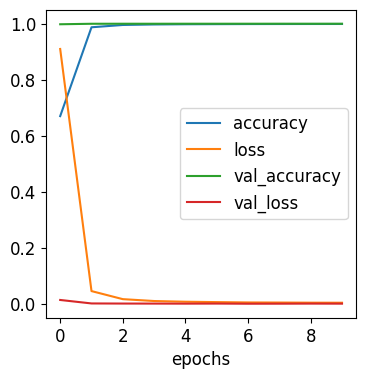

In [ ]:
# from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=10, mode='min', restore_best_weights=True)
backend.clear_session()
if(model_used == 'lstm'):
    model = multiClassModel1(n_features, n_classes)
    history = model.fit(X_train_lstm, y_train,
                        epochs=10,
                        batch_size=2048,
                        validation_split = 0.10,
                        #validation_data=(X_test_lstm, y_test),
                        callbacks=[callback],
                        verbose = 1)  #

elif(model_used == 'cnn+fc'):
    model = multiClassModel2(n_features, n_classes)
    history = model.fit(X_train, y_train, #enc.inverse_transform(y_train),
                        epochs=10,
                        batch_size=2048,
                        validation_split = 0.20,
                        #validation_data=(X_test, y_test), #enc.inverse_transform(y_test)),
                        callbacks=[callback],
                        verbose = 1)  #


    ### check the loss trend of epochs
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(4, 4))

import matplotlib.pyplot as plt
plt.show()

<Axes: xlabel='epochs'>

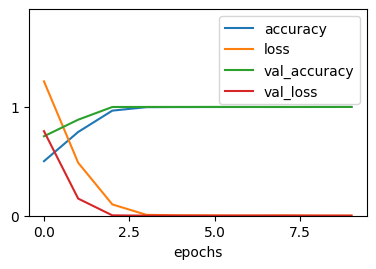

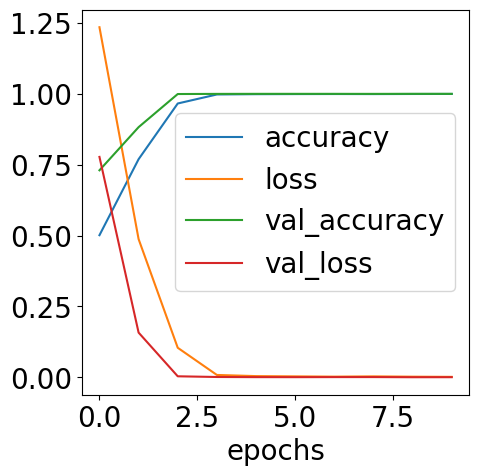

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
#fig = pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(4, 2))

# Assuming history.history is a dictionary with metric names as keys and lists of values as values
history_subset = {key: value[:50] for key, value in history.history.items()}
fig = pd.DataFrame(history_subset).plot(kind='line', xlabel='epochs', figsize=(4, 2.8))
plt.ylim(0, 1.9)
plt.tight_layout()
fig.figure.savefig('loss_accuracy_CNN_50_epochs.eps', format='eps')
fig.figure.savefig('loss_accuracy_CNN_50_epochs.png', dpi= 600)

plt.rcParams.update({'font.size': 20})
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(5, 5))


In [ ]:
from keras.models import save_model
pulmo_dataset_path = r'D:\Datasets, Code,  Repositories, TF and TFLite Models\Pulmo data\all classes'
model_path = os.path.join(pulmo_dataset_path, 'cnn+fc_on_20_percent_data_normal_class')#'cnn+fc_model')
tf.saved_model.save(model, model_path)
#save_model(model, model_path)

In [ ]:
# predicting on training set
if(model_used == 'lstm'):
    y_train_pred_prob = model.predict(X_train_lstm)
    y_train_pred = np.argmax(y_train_pred_prob, axis=1)
elif(model_used == 'cnn+fc'):
    y_train_pred_prob = model.predict(X_train)
    y_train_pred = np.argmax(y_train_pred_prob, axis=1)
#plt.plot(y_train)
#plt.plot(y_train_pred)

if(model_used == 'lstm'):
    y_test_pred_prob = model.predict(X_test_lstm)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)
elif(model_used == 'cnn+fc'):
    y_test_pred_prob = model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# converting the onehot encoded y_train and y_test to integer encoded representation to work on classification reports.
#y_train.shape
if(label_encoding_scheme=='one_hot'):
    y_train_original = enc.inverse_transform(y_train)
    y_test_original = enc.inverse_transform(y_test)

    # Convert one-hot encoded y_train back to integer-encoded
    integer_encoded_y_train = le.fit_transform(y_train_original.squeeze())
    integer_encoded_y_test = le.fit_transform(y_test_original.squeeze())
    print(integer_encoded_y_train.shape, '\n', y_train_original.shape, '\n', y_train_pred.shape)

#print(X_train.shape, enc.inverse_transform(y_train).shape)
#print(X_train.shape[1:])

11990/11990 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step
6064/6064 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


In [ ]:
class_labels = {
    'Asthma': 0,
    'COPD': 1,
    'ILD': 2,
    'PN': 3,
    'TB': 4,
    'Normal': 5
}
class_labels.keys()
display_labels = list(class_labels.keys())
display_labels

['Asthma', 'COPD', 'ILD', 'PN', 'TB', 'Normal']

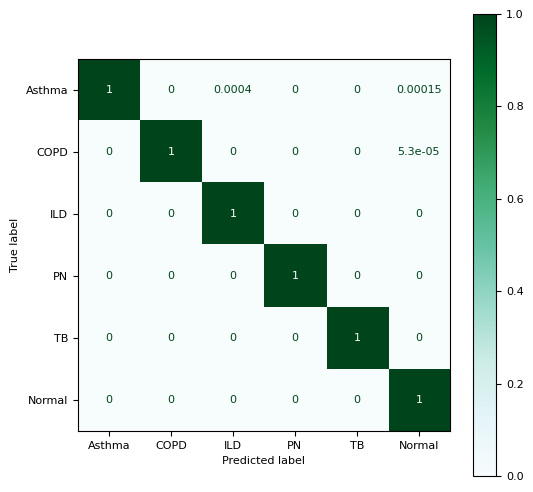

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

plt.rcParams.update({'font.size': 8})

#cm = confusion_matrix(integer_encoded_y_train, y_train_pred, normalize='true')
#fig, ax = plt.subplots(figsize=(10, 10))

# USE THE FOLLOWING LINE ONLY WHEN WE DON'T USE ONE-HOT ENCODED LABELS

if(label_encoding_scheme=='integer'):
    integer_encoded_y_train = y_train

cm = confusion_matrix(integer_encoded_y_train, y_train_pred, normalize='true')

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot(ax=ax, cmap = 'BuGn', xticks_rotation = 0)
plt.show()

fig.savefig('CM_training_set_CNN_20_percent_pulmo_data.eps', format='eps')
fig.savefig('CM_training_set_CNN_20_percent_pulmo_data.png', dpi = 600)

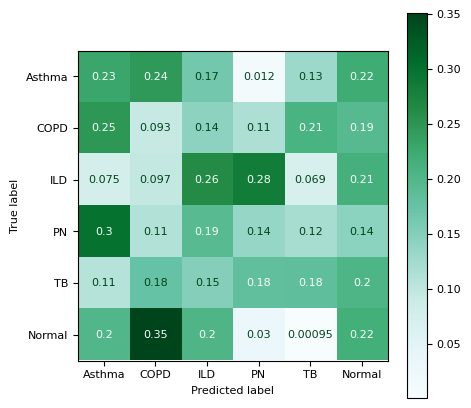

In [ ]:
# uncomment following line, if you are using integer encoding
if(label_encoding_scheme=='integer'):
    integer_encoded_y_test = y_test
cm = confusion_matrix(integer_encoded_y_test, y_test_pred, normalize='true')
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot(ax=ax, cmap = 'BuGn', xticks_rotation = 0)
plt.show()
fig.savefig('CM_test_set_CNN_20_percent_pulmo_data.eps', format='eps')
fig.savefig('CM_test_set_CNN_20_percent_pulmo_data.png', format='png', dpi = 600)

In [ ]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [ ]:
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title):
    y_cat = to_categorical(y)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
#y_train_labels = le.inverse_transform(np.argmax(y_train, axis=1))     # for ONE-Hot encoding
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61740
           1       1.00      1.00      1.00     74970
           2       1.00      1.00      1.00     74970
           3       1.00      1.00      1.00     52920
           4       1.00      1.00      1.00     44100
           5       1.00      1.00      1.00     74970

    accuracy                           1.00    383670
   macro avg       1.00      1.00      1.00    383670
weighted avg       1.00      1.00      1.00    383670



,accuracy,precision,recall,f1_score
0,0.9999,0.9994,1.0,0.9997
1,1.0,0.9999,1.0,1.0
2,0.9999,1.0,0.9997,0.9998
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,0.9998,0.9999


In [ ]:
y_test_pred_labels = le.inverse_transform(y_test_pred)

# for integer encoding
y_test_true_labels = le.inverse_transform(y_test)

# for one-hot label encoding
#y_test_true_labels = le.inverse_transform(np.argmax(y_test, axis=1))
print(classification_report(y_test_true_labels,y_test_pred_labels))


              precision    recall  f1-score   support

           0       0.26      0.23      0.24     44100
           1       0.13      0.09      0.11     48510
           2       0.11      0.26      0.15     13230
           3       0.14      0.14      0.14     22050
           4       0.29      0.18      0.23     44100
           5       0.12      0.22      0.16     22050

    accuracy                           0.17    194040
   macro avg       0.18      0.19      0.17    194040
weighted avg       0.20      0.17      0.18    194040



In [ ]:
y_test_true_labels.shape
#y_test_pred_labels.shape
labels

array([4, 3, 2, 1, 0], dtype=int64)

In [ ]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
0,0.6767,0.2597,0.2284,0.2431
1,0.6189,0.131,0.0931,0.1089
2,0.7978,0.1057,0.2633,0.1508
3,0.8069,0.1396,0.1356,0.1376
4,0.7147,0.295,0.1838,0.2265
5,0.7348,0.1226,0.2165,0.1565


In [ ]:
# converting the onehot encoded y_train and y_test to integer encoded representation to work on classification reports.
#y_train.shape

#y_train_original = enc.inverse_transform(y_train)
#y_test_original = enc.inverse_transform(y_test)

# Convert one-hot encoded y_train back to integer-encoded
#integer_encoded_y_train = le.fit_transform(y_train_original.squeeze())
#integer_encoded_y_test = le.fit_transform(y_test_original.squeeze())


(105450, 5)

In [ ]:
import matplotlib.pyplot as plt

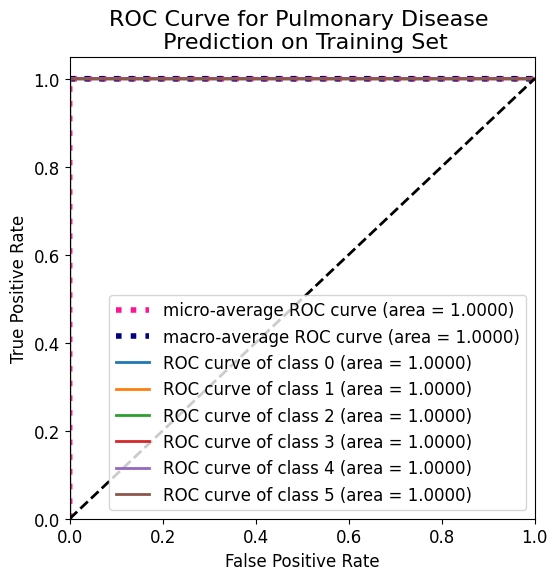

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
#plt.figsize(6,6)
RoC_Curve( y_train_pred_prob,   integer_encoded_y_train,      le.classes_,
           title='ROC Curve for Pulmonary Disease \n Prediction on Training Set')

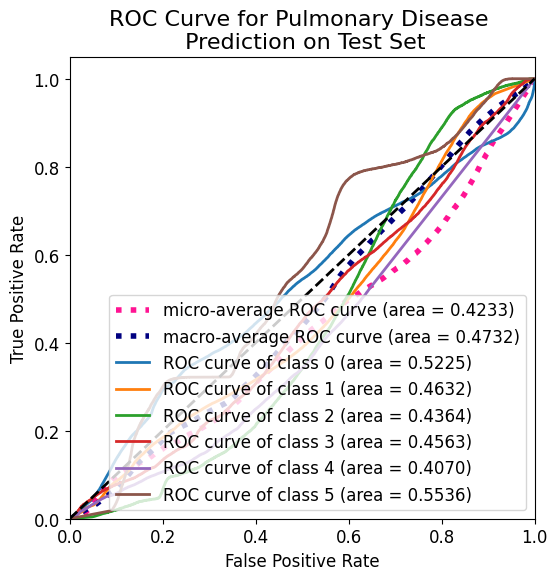

In [ ]:
RoC_Curve(y_test_pred_prob, integer_encoded_y_test, le.classes_,
          title='ROC Curve for Pulmonary Disease \n Prediction on Test Set')